In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
pd.set_option('display.max_columns', None)

In [2]:
#loading the data
df=pd.read_csv(r"C:\Users\nair7\Downloads\fetal_health.csv")
df

baseline value  accelerations  fetal_movement  uterine_contractions  \
0                120          0.000           0.000                 0.000   
1                132          0.006           0.000                 0.006   
2                133          0.003           0.000                 0.008   
3                134          0.003           0.000                 0.008   
4                132          0.007           0.000                 0.008   
...              ...            ...             ...                   ...   
2121             140          0.000           0.000                 0.007   
2122             140          0.001           0.000                 0.007   
2123             140          0.001           0.000                 0.007   
2124             140          0.001           0.000                 0.006   
2125             142          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
0                   0.000                   0.0                       0.0   
1                   0.003                   0.0                       0.0   
2                   0.003                   0.0                       0.0   
3                   0.003                   0.0                       0.0   
4                   0.000                   0.0                       0.0   
...                   ...                   ...                       ...   
2121                0.000                   0.0                       0.0   
2122                0.000                   0.0                       0.0   
2123                0.000                   0.0                       0.0   
2124                0.000                   0.0                       0.0   
2125                0.000                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                                  73                                   0.5   
1                                  17                                   2.1   
2                                  16                                   2.1   
3                                  16                                   2.4   
4                                  16                                   2.4   
...                               ...                                   ...   
2121                               79                                   0.2   
2122                               78                                   0.4   
2123                               79                                   0.4   
2124                               78                                   0.4   
2125                               74                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  \
0                                                    43        
1                                                     0        
2                                                     0        
3                                                     0        
4                                                     0        
...                                                 ...        
2121                                                 25        
2122                                                 22        
2123                                                 20        
2124                                                 27        
2125                                                 36        

      mean_value_of_long_term_variability  histogram_width  histogram_min  \
0                                     2.4               64             62   
1                                    10.4              130             68   
2                                    13.4              130             68   
3                                    23.0              117             53   
4                                    19.9            

In [3]:
#to find number of rows and columns
df.shape

(2126, 22)

In [4]:
#to find the basic details of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   int64  
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   int64  
 8   mean_value_of_short_term_variability  

In [5]:
#find different datatypes
df.dtypes

baseline value                                              int64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                             int64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability      int64
mean_value_of_long_term_variability                       float64
histogram_width                                             int64
histogram_min                                               int64
histogram_max                                               int64
histogram_number_of_peaks                                   int64
histogram_

In [6]:
#finds the  index of columns
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [7]:
df.describe()

baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057                  0.000590   
min               0.000000              0.000000                  0.000000   
25%               0.000000              0.000000                  0.000000   
50%               0.000000              0.000000                  0.000000   
75%               0.003000              0.000000                  0.000000   
max               0.015000              0.001000                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      2126.000000                           2126.000000   
mean                         46.990122                              1.332785   
std                          17.192814                              0.883241   
min                          12.000000                              0.200000   
25%                          32.000000                              0.700000   
50%                          49.000000                              1.200000   
75%                          61.000000                              1.700000   
max                          87.000000                              7.000000   

       percentage_of_time_with_abnormal_long_term_variability  \
count                                         2126.00000        
mean                                             9.84666        
std                                             18.39688        
min                                              0.00000        
25%                                              0.00000        
50%                                              0.00000        
75%                                             11.00000        
max                                             91.00000        

       mean_value_of_long_term_variability  histogram_width  histogram_min  \
count                          2126.000000      2126.000000    2126.000000   
mean                              8.187629        70.445908      93.579492   
std                               5.628247        38.955693      29.560212   
min                               0.000000         3.000000      50.000000   
25%                               4.600000        37.000000      67.000000   
50%                               7.400000        67.500000      93.000000   
75%                              10.800000       100.000000     120.000000   
max                              50.700000       180.000000     159.000000   

       histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
count    2126.000000                2126.000000                 2126.000000   
mean      164.025400                   4.068203                    0.323612   
std        17.944183                   2.949386                    0.706059   
min       122.000000                   0.000000                    0.000000   
25%       152.000000                   2.000000                    0.000000   
50%       162.000000                   3.000000                    0.000000   
75%       174.000000                  

In [8]:
#shows the unique values
df.nunique()

baseline value                                             48
accelerations                                              20
fetal_movement                                            102
uterine_contractions                                       16
light_decelerations                                        16
severe_decelerations                                        2
prolongued_decelerations                                    6
abnormal_short_term_variability                            75
mean_value_of_short_term_variability                       57
percentage_of_time_with_abnormal_long_term_variability     87
mean_value_of_long_term_variability                       249
histogram_width                                           154
histogram_min                                             109
histogram_max                                              86
histogram_number_of_peaks                                  18
histogram_number_of_zeroes                                  9
histogra

In [10]:
#finds the first five rows in the dataset
df.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0             120          0.000             0.0                 0.000   
1             132          0.006             0.0                 0.006   
2             133          0.003             0.0                 0.008   
3             134          0.003             0.0                 0.008   
4             132          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                               73                                   0.5   
1                               17                                   2.1   
2                               16                                   2.1   
3                               16                                   2.4   
4                               16                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  \
0                                                 43        
1                                                  0        
2                                                  0        
3                                                  0        
4                                                  0        

   mean_value_of_long_term_variability  histogram_width  histogram_min  \
0                                  2.4               64             62   
1                                 10.4              130             68   
2                                 13.4              130             68   
3                                 23.0              117             53   
4                                 19.9              117             53   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0            126                          2                           0   
1            198                          6                           1   
2            198                          5                           1   
3            170                         11                           0   
4            170                          9                           0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0             120             137               121                  73   
1             141             136               140                  12   
2             141             135               138                  13   
3             137             134               137                  13   
4             137             136               138                  11   

   histogram_tendency  fetal_health  
0                   1             2  
1                   0             1  
2                   0             1  
3                   1             1  
4                   1             1

In [11]:
df.tail()

baseline value  accelerations  fetal_movement  uterine_contractions  \
2121             140          0.000           0.000                 0.007   
2122             140          0.001           0.000                 0.007   
2123             140          0.001           0.000                 0.007   
2124             140          0.001           0.000                 0.006   
2125             142          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
2121                  0.0                   0.0                       0.0   
2122                  0.0                   0.0                       0.0   
2123                  0.0                   0.0                       0.0   
2124                  0.0                   0.0                       0.0   
2125                  0.0                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
2121                               79                                   0.2   
2122                               78                                   0.4   
2123                               79                                   0.4   
2124                               78                                   0.4   
2125                               74                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  \
2121                                                 25        
2122                                                 22        
2123                                                 20        
2124                                                 27        
2125                                                 36        

      mean_value_of_long_term_variability  histogram_width  histogram_min  \
2121                                  7.2               40            137   
2122                                  7.1               66            103   
2123                                  6.1               67            103   
2124                                  7.0               66            103   
2125                                  5.0               42            117   

      histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
2121            177                          4                           0   
2122            169                          6                           0   
2123            170                          5                           0   
2124            169                          6                           0   
2125            159                          2                           1   

      histogram_mode  histogram_mean  histogram_median  histogram_variance  \
2121             153             150               152                   2   
2122             152             148               151                   3   
2123             153             148               152                   4   
2124             152             147               151                   4   
2125             145             143               145                   1   

      histogram_tendency  fetal_health  
2121                   0             2  
2122                   1             2  
2123                   1             2  
2124                   1             2  
2125                   0             1

In [12]:
df.corr()

baseline value  \
baseline value                                            1.000000   
accelerations                                            -0.080560   
fetal_movement                                           -0.033436   
uterine_contractions                                     -0.146373   
light_decelerations                                      -0.159032   
severe_decelerations                                     -0.053518   
prolongued_decelerations                                 -0.104597   
abnormal_short_term_variability                           0.305570   
mean_value_of_short_term_variability                     -0.279607   
percentage_of_time_with_abnormal_long_term_vari...        0.285630   
mean_value_of_long_term_variability                      -0.032091   
histogram_width                                          -0.147679   
histogram_min                                             0.361619   
histogram_max                                             0.275110   
histogram_number_of_peaks                                -0.113933   
histogram_number_of_zeroes                               -0.004745   
histogram_mode                                            0.708993   
histogram_mean                                            0.723121   
histogram_median                                          0.789246   
histogram_variance                                       -0.133938   
histogram_tendency                                        0.293503   
fetal_health                                              0.148151   

                                                    accelerations  \
baseline value                                          -0.080560   
accelerations                                            1.000000   
fetal_movement                                           0.048235   
uterine_contractions                                     0.089674   
light_decelerations                                     -0.108615   
severe_decelerations                                    -0.043018   
prolongued_decelerations                                -0.127749   
abnormal_short_term_variability                         -0.279577   
mean_value_of_short_term_variability                     0.207170   
percentage_of_time_with_abnormal_long_term_vari...      -0.373943   
mean_value_of_long_term_variability                     -0.142363   
histogram_width                                          0.298631   
histogram_min                                           -0.154286   
histogram_max                                            0.394147   
histogram_number_of_peaks                                0.190452   
histogram_number_of_zeroes                              -0.006147   
histogram_mode                                           0.243610   
histogram_mean                                           0.270334   
histogram_median                                         0.272849   
histogram_variance                                       0.125704   
histogram_tendency                                       0.028420   
fetal_health                                            -0.364066   

                                                    fetal_movement  \
baseline value                                           -0.033436   
accelerations                                             0.048235   
fetal_movement                                            1.000000   
uterine_contractions                                     -0.068779   
light_decelerations                                       0.049228   
severe_decelerations                                     -0.010976   
prolongued_decelerations                                  0.265922   
abnormal_short_term_variability                          -0.103715   
mean_value_of_short_term_variability                      0.121314   
percentage_of_time_with_abnormal_long_term_vari...       -0.074096   
mean_value_of_long_term_variability                       0.011047   
histogram_wid

<AxesSubplot:>

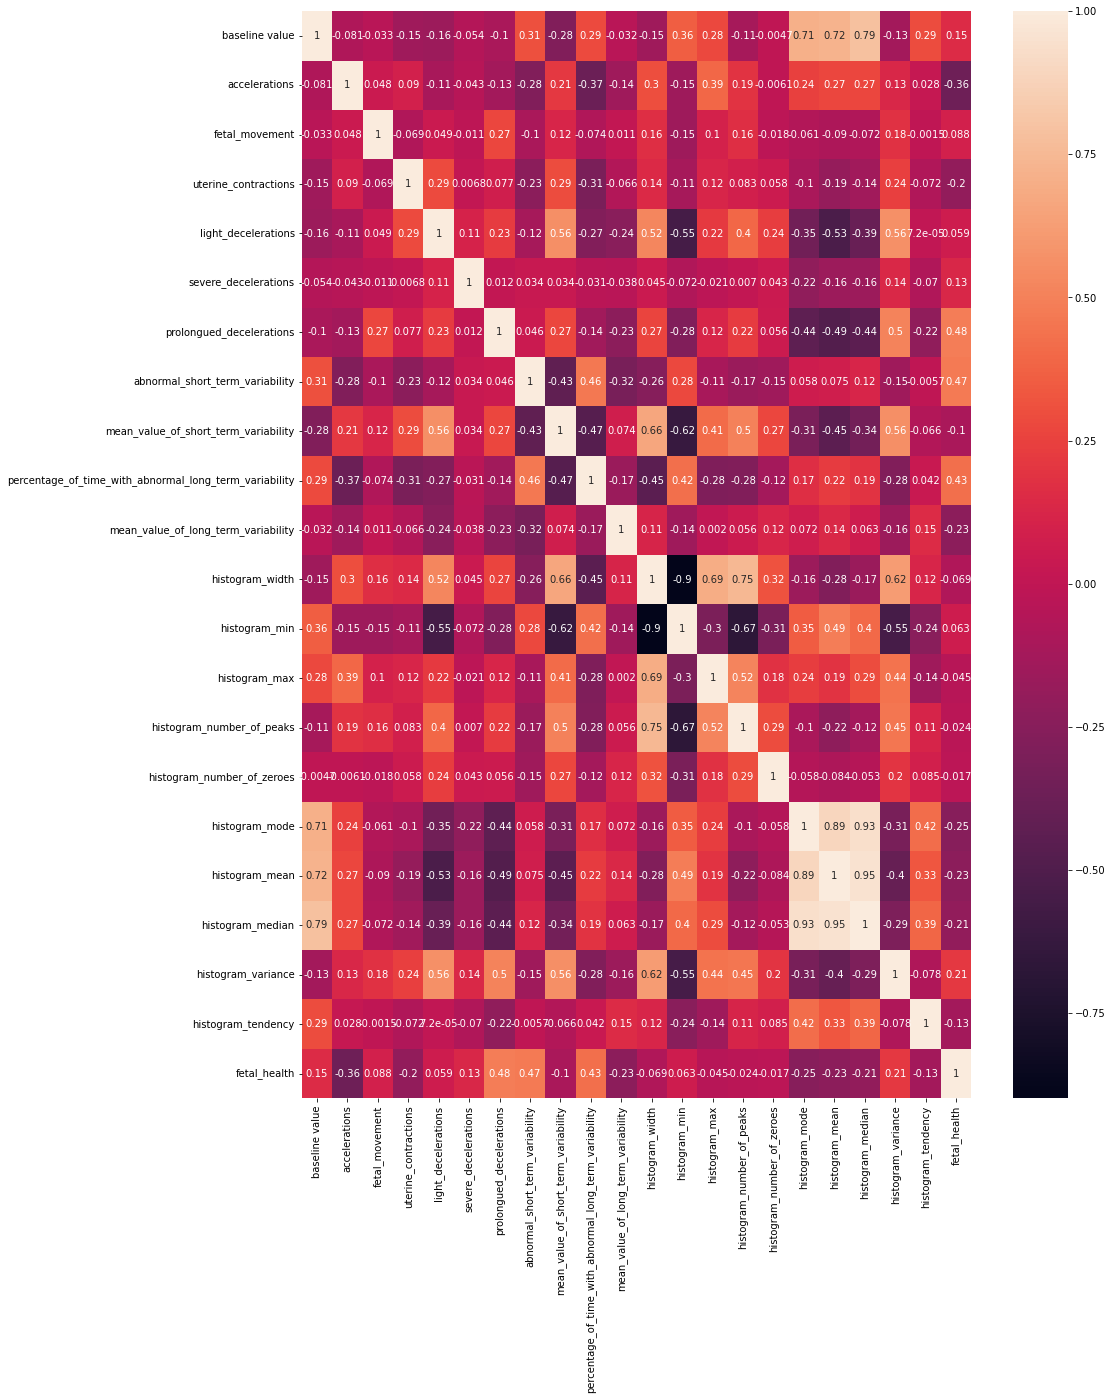

In [13]:
#PLOT HEAT MAP
plt.figure(figsize=(15,20))
sns.heatmap(df.corr(),annot=True)

In [14]:
#to find missing values
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

# DATA VISUALIZATION

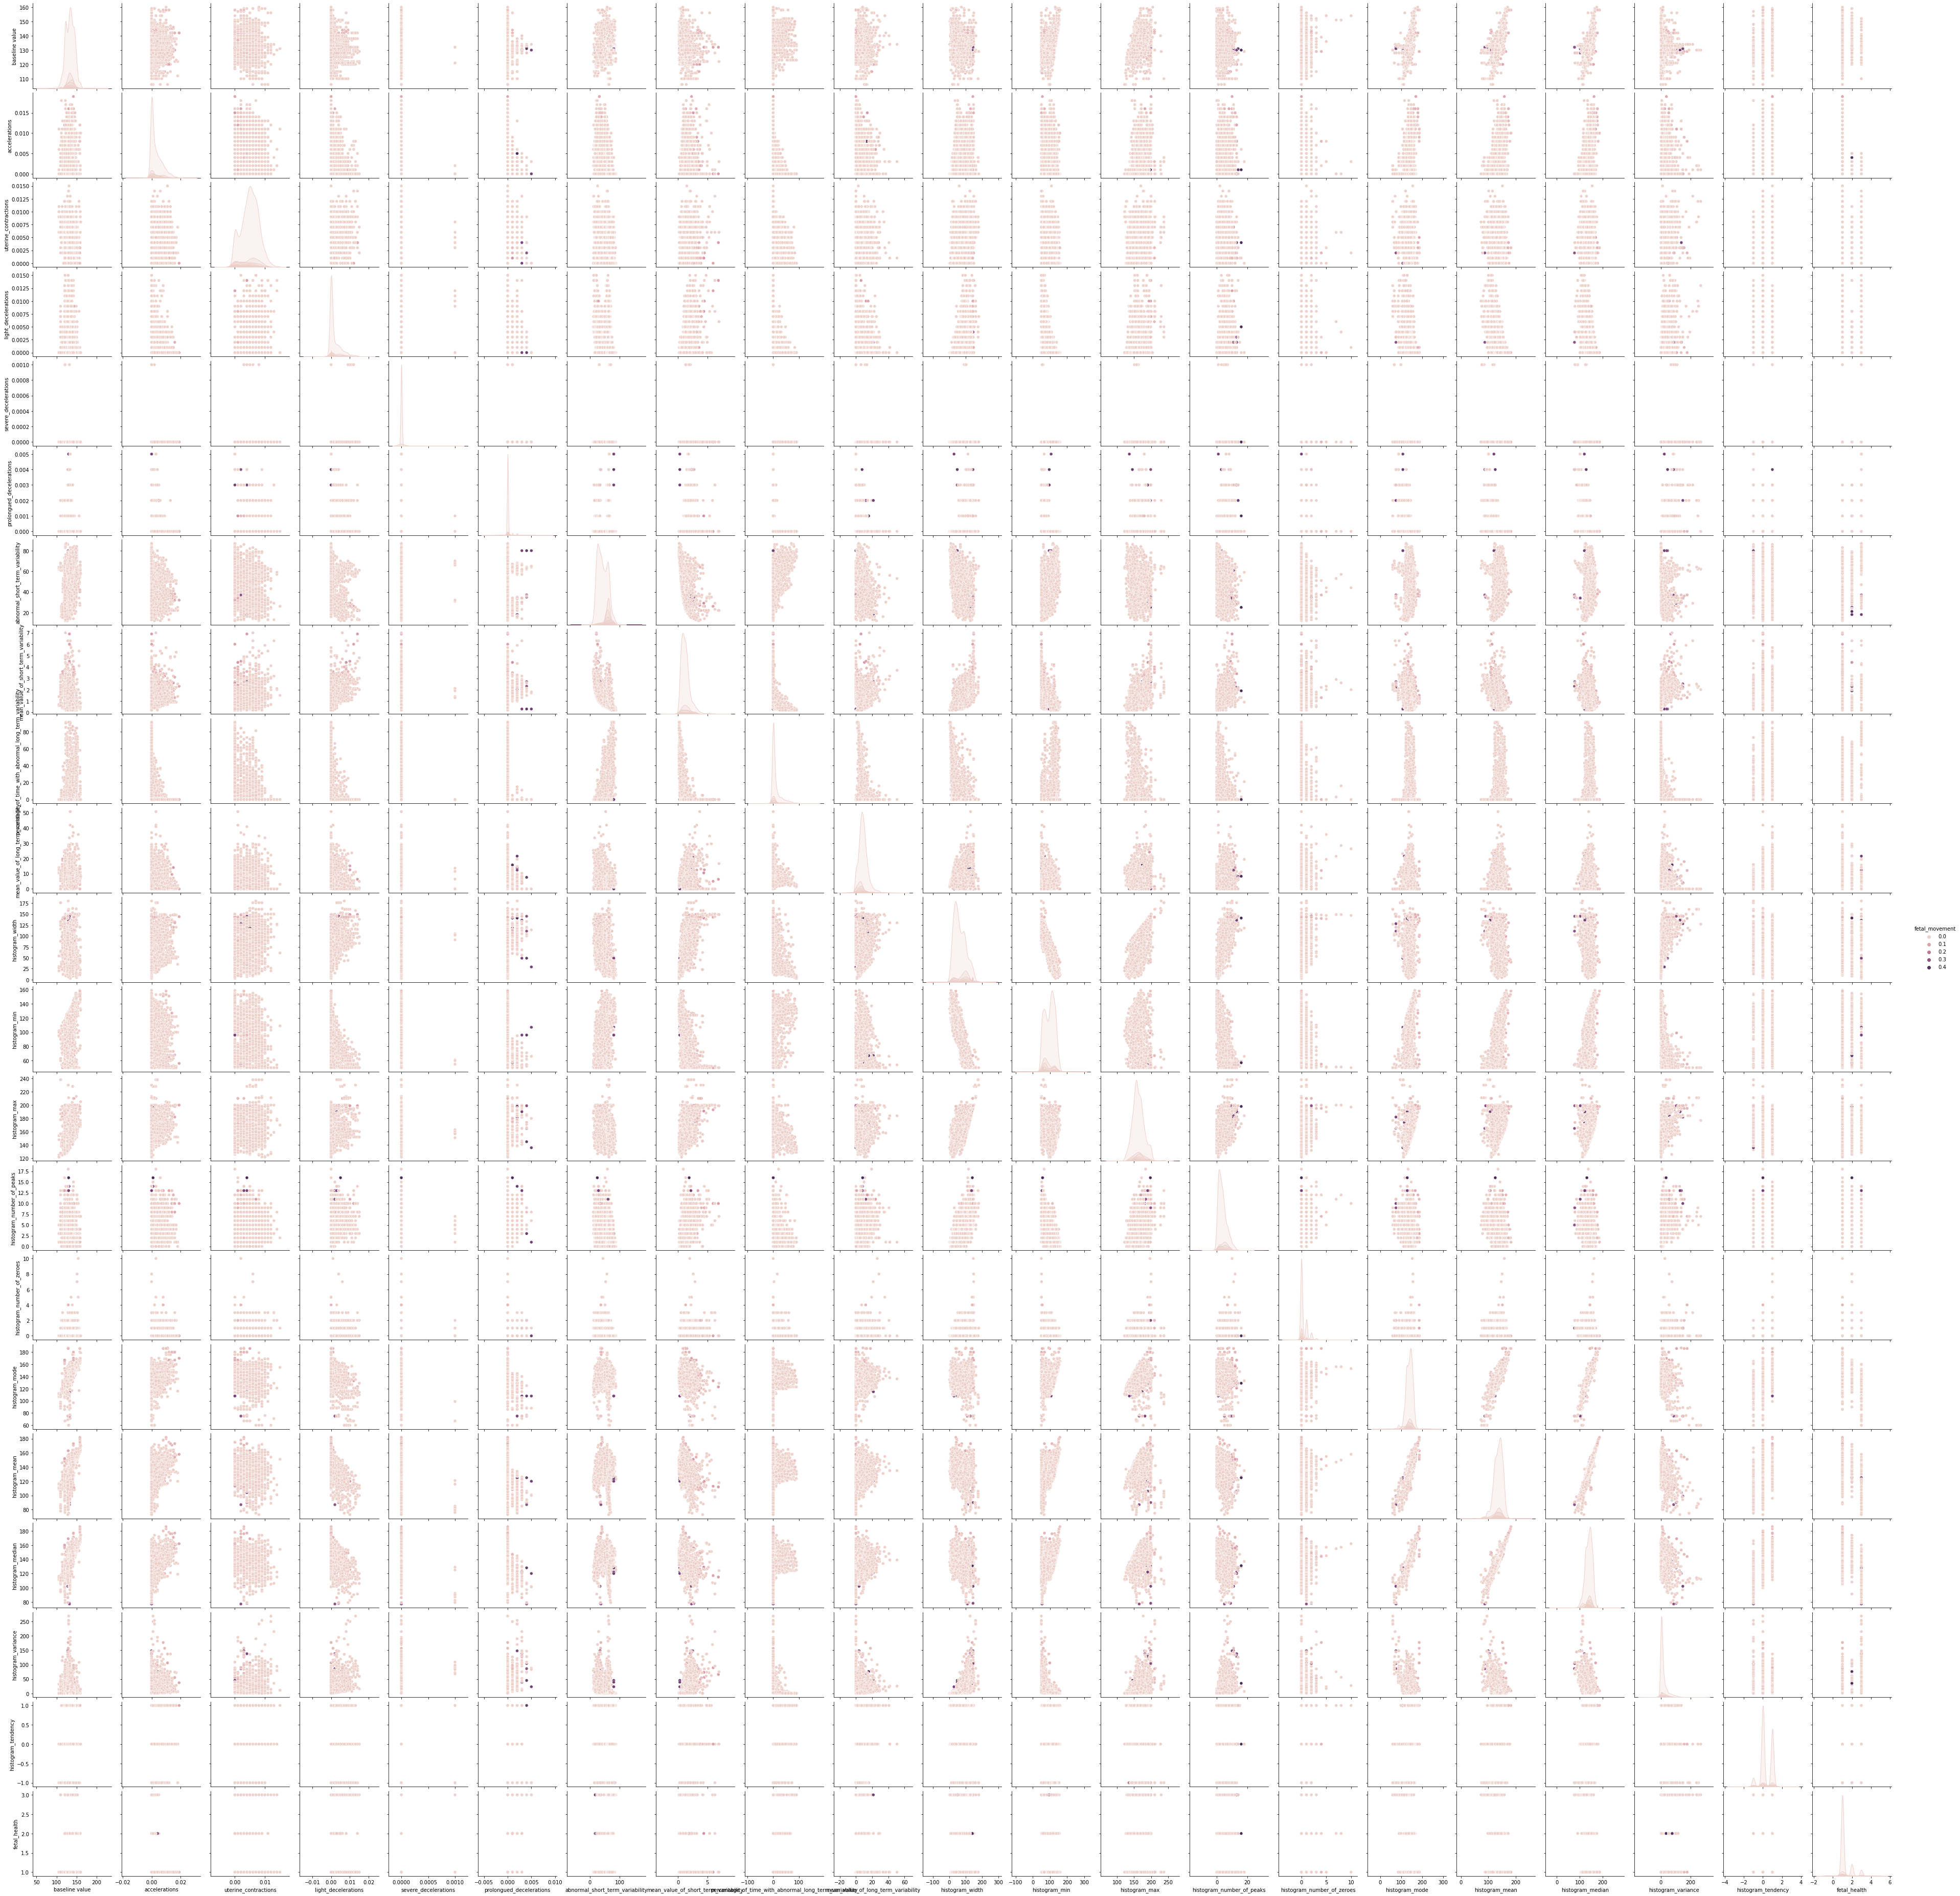

In [15]:
sns.pairplot(df, hue='fetal_movement')

<AxesSubplot:xlabel='uterine_contractions', ylabel='severe_decelerations'>

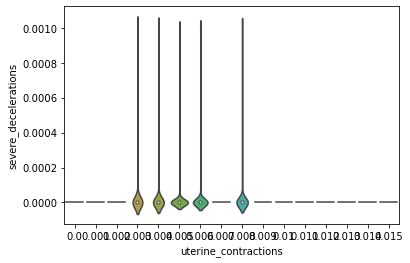

In [16]:
sns.violinplot(x='uterine_contractions',y='severe_decelerations',data=df)

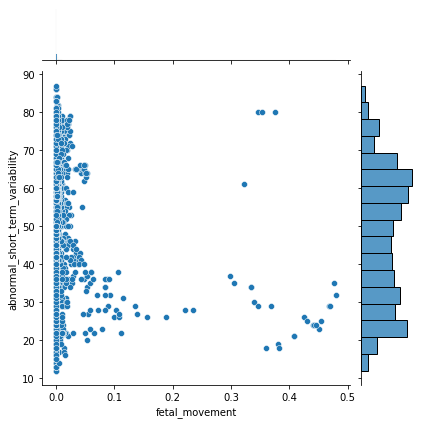

In [17]:
sns.jointplot(x='fetal_movement',y='abnormal_short_term_variability',data=df,kind='scatter')

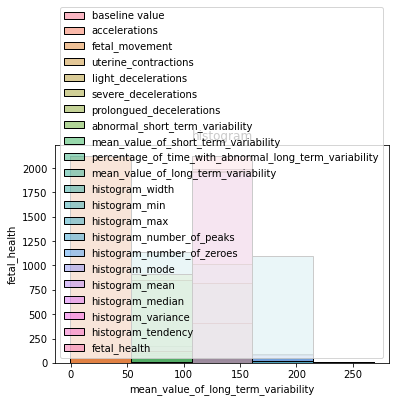

In [18]:
#plot histogram
sns.histplot(df,bins=5,color='skyblue',edgecolor='black')
plt.xlabel('mean_value_of_long_term_variability')
plt.ylabel('fetal_health')
plt.title("histogram")
plt.show()

In [19]:
x = df.drop('fetal_health',axis=1)
x

baseline value  accelerations  fetal_movement  uterine_contractions  \
0                120          0.000           0.000                 0.000   
1                132          0.006           0.000                 0.006   
2                133          0.003           0.000                 0.008   
3                134          0.003           0.000                 0.008   
4                132          0.007           0.000                 0.008   
...              ...            ...             ...                   ...   
2121             140          0.000           0.000                 0.007   
2122             140          0.001           0.000                 0.007   
2123             140          0.001           0.000                 0.007   
2124             140          0.001           0.000                 0.006   
2125             142          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
0                   0.000                   0.0                       0.0   
1                   0.003                   0.0                       0.0   
2                   0.003                   0.0                       0.0   
3                   0.003                   0.0                       0.0   
4                   0.000                   0.0                       0.0   
...                   ...                   ...                       ...   
2121                0.000                   0.0                       0.0   
2122                0.000                   0.0                       0.0   
2123                0.000                   0.0                       0.0   
2124                0.000                   0.0                       0.0   
2125                0.000                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                                  73                                   0.5   
1                                  17                                   2.1   
2                                  16                                   2.1   
3                                  16                                   2.4   
4                                  16                                   2.4   
...                               ...                                   ...   
2121                               79                                   0.2   
2122                               78                                   0.4   
2123                               79                                   0.4   
2124                               78                                   0.4   
2125                               74                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  \
0                                                    43        
1                                                     0        
2                                                     0        
3                                                     0        
4                                                     0        
...                                                 ...        
2121                                                 25        
2122                                                 22        
2123                                                 20        
2124                                                 27        
2125                                                 36        

      mean_value_of_long_term_variability  histogram_width  histogram_min  \
0                                     2.4               64             62   
1                                    10.4              130             68   
2                                    13.4              130             68   
3                                    23.0              117             53   
4                                    19.9            

In [20]:
y=df['fetal_health']
y

0       2
1       1
2       1
3       1
4       1
       ..
2121    2
2122    2
2123    2
2124    2
2125    1
Name: fetal_health, Length: 2126, dtype: int64

In [21]:
#splitting the data into training and testing 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
#featurescailng
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test= sc.transform(x_test)

In [23]:
x_train.shape

(1700, 21)

In [24]:
x_test.shape

(426, 21)

# MODEL CREATION AND EVALUATION

# LOGISTIC REGRESSION

In [25]:

lr = LogisticRegression()
model_lr =lr.fit(x_train,y_train)
y_pred_lr = model_lr.predict(x_test)
print(confusion_matrix(y_test,y_pred_lr))
print('accuracy =',accuracy_score(y_test,y_pred_lr)*100)
print(classification_report(y_test,y_pred_lr))

[[311  19   3]
 [ 18  41   5]
 [  2   5  22]]
accuracy = 87.79342723004694
              precision    recall  f1-score   support

           1       0.94      0.93      0.94       333
           2       0.63      0.64      0.64        64
           3       0.73      0.76      0.75        29

    accuracy                           0.88       426
   macro avg       0.77      0.78      0.77       426
weighted avg       0.88      0.88      0.88       426



In [32]:
df.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0             120          0.000             0.0                 0.000   
1             132          0.006             0.0                 0.006   
2             133          0.003             0.0                 0.008   
3             134          0.003             0.0                 0.008   
4             132          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                               73                                   0.5   
1                               17                                   2.1   
2                               16                                   2.1   
3                               16                                   2.4   
4                               16                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  \
0                                                 43        
1                                                  0        
2                                                  0        
3                                                  0        
4                                                  0        

   mean_value_of_long_term_variability  histogram_width  histogram_min  \
0                                  2.4               64             62   
1                                 10.4              130             68   
2                                 13.4              130             68   
3                                 23.0              117             53   
4                                 19.9              117             53   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0            126                          2                           0   
1            198                          6                           1   
2            198                          5                           1   
3            170                         11                           0   
4            170                          9                           0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0             120             137               121                  73   
1             141             136               140                  12   
2             141             135               138                  13   
3             137             134               137                  13   
4             137             136               138                  11   

   histogram_tendency  fetal_health  
0                   1             2  
1                   0             1  
2                   0             1  
3                   1             1  
4                   1             1

In [33]:
new_data=[[120,0.000,0.000,0.000,0.000,0.0,0.0,73,0.5,43,2.4,64,62,126,2,0,120,137,121,73,1]]
new_data_scaled=sc.transform(new_data)
prediction = model_lr.predict(new_data_scaled)
print("predicted value =",prediction)

predicted value = [2]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [35]:
new_data=[[132,0.006,0.000,0.006,0.003,0.0,0.0,17,2.1,0,10.4,130,68,198,6,1,141,136,140,12,0]]
new_data_scaled=sc.transform(new_data)
prediction = model_lr.predict(new_data_scaled)
print("predicted value =",prediction)

predicted value = [1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# DECISIONTREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dt = DecisionTreeClassifier()
model_dt =dt.fit(x_train,y_train)
y_pred_dt = model_dt.predict(x_test)
print(confusion_matrix(y_test,y_pred_dt))
print('accuracy =',accuracy_score(y_test,y_pred_dt)*100)
print(classification_report(y_test,y_pred_dt))

# RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
model_rfc =rfc.fit(x_train,y_train)
y_pred_rfc = model_rfc.predict(x_test)
print(confusion_matrix(y_test,y_pred_rfc))
print('accuracy =',accuracy_score(y_test,y_pred_rfc)*100)
print(classification_report(y_test,y_pred_rfc))

# BOOSTING ALGORITHMS

# GRADIENT BOOSTING ALGORITHMS

In [ ]:
 from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
model_gbc =gbc.fit(x_train,y_train)
y_pred_gbc = model_gbc.predict(x_test)
print(confusion_matrix(y_test,y_pred_gbc))
print('accuracy =',accuracy_score(y_test,y_pred_gbc)*100)
print(classification_report(y_test,y_pred_gbc))

# ADABOOSTCLASSIFIER

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
model_ada =ada.fit(x_train,y_train)
y_pred_ada = model_ada.predict(x_test)
print(confusion_matrix(y_test,y_pred_ada))
print('accuracy =',accuracy_score(y_test,y_pred_ada)*100)
print(classification_report(y_test,y_pred_ada))

# Out of all these algorithms gradientboosting alorithm having highest accuracy
logistic regression---87.7%
decisiontreeclassifier---92.4%
randomforestclassifier---94.6%
gradientboostingclassifier---95.07%
adaboostclassifier---91.07%

# PREDICTION

In [36]:
df.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0             120          0.000             0.0                 0.000   
1             132          0.006             0.0                 0.006   
2             133          0.003             0.0                 0.008   
3             134          0.003             0.0                 0.008   
4             132          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                               73                                   0.5   
1                               17                                   2.1   
2                               16                                   2.1   
3                               16                                   2.4   
4                               16                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  \
0                                                 43        
1                                                  0        
2                                                  0        
3                                                  0        
4                                                  0        

   mean_value_of_long_term_variability  histogram_width  histogram_min  \
0                                  2.4               64             62   
1                                 10.4              130             68   
2                                 13.4              130             68   
3                                 23.0              117             53   
4                                 19.9              117             53   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0            126                          2                           0   
1            198                          6                           1   
2            198                          5                           1   
3            170                         11                           0   
4            170                          9                           0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0             120             137               121                  73   
1             141             136               140                  12   
2             141             135               138                  13   
3             137             134               137                  13   
4             137             136               138                  11   

   histogram_tendency  fetal_health  
0                   1             2  
1                   0             1  
2                   0             1  
3                   1             1  
4                   1             1

In [37]:
new_data=[[120,0.000,0.000,0.000,0.000,0.0,0.0,73,0.5,43,2.4,64,62,126,2,0,120,137,121,73,1]]
new_data_scaled=sc.transform(new_data)
prediction = model_lr.predict(new_data_scaled)
print("predicted value =",prediction)

predicted value = [2]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
new_data=[[132,0.006,0.000,0.006,0.003,0.0,0.0,17,2.1,0,10.4,130,68,198,6,1,141,136,140,12,0]]
new_data_scaled=sc.transform(new_data)
prediction = model_lr.predict(new_data_scaled)
print("predicted value =",prediction)

predicted value = [1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
